Name: Limin Zhou  
Student ID: 22634156  
Projeect1: Train AdaBoostRegressor model on abalone data, to predict the Rings of abalone.  
Project2: Train two Random Forest model on original data and reduced-dimensional red wine data to predict the quality of red wine.

# Project 1:

## Read Data and add column names

In [ ]:
import pandas as pd

In [ ]:
# read data
df_noHeader = pd.read_csv('abalone.data',header=None)

In [ ]:
df_noHeader.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


The data with no headers, so I need to add headers for the dataframe:

In [ ]:
values = df_noHeader.values
# list with headers
attrs = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [ ]:
df = pd.DataFrame(data=list(values), columns=attrs)

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


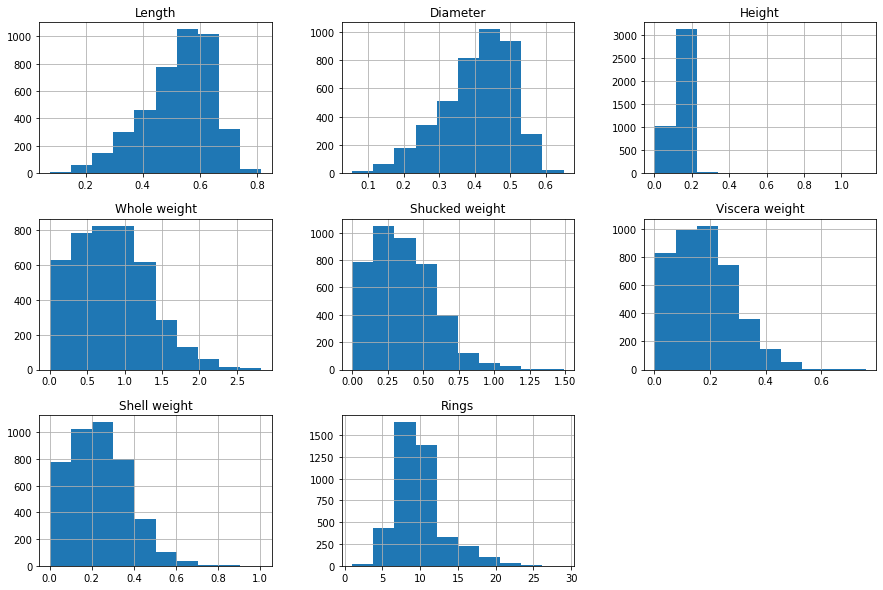

In [ ]:
# histgram of each numerical features
df.hist(figsize=(15,10));

## 1. Clean Data

### 1.1 Remove two useless columns

In [ ]:
# check the correlations between Rings and features
correlation = df.corr()
print(correlation['Rings'].sort_values(ascending=False))

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64


In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
df_features = df.drop(['Rings'], axis=1)

Use heat map to display the correlations bewteen all features:

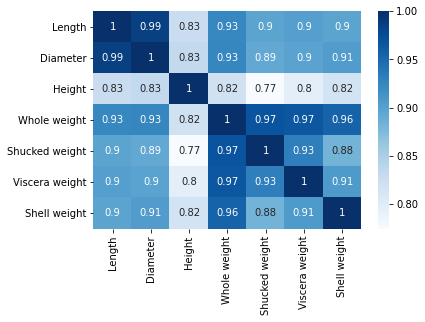

In [ ]:
import seaborn as sb
corr = df_features.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

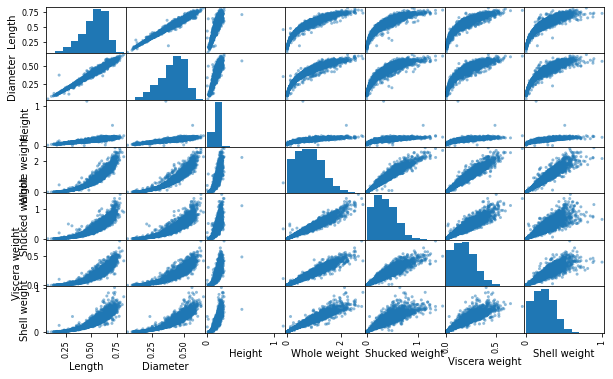

In [ ]:
#  check the correlaions between all features with scatter plot
scatter_matrix(df_features,figsize=(10,6));

As the correlation matrix and scatter matrix.  

I decide to remove one between Diameter and Length, the correlation between them is very high, their effect would be similar. At the same time, i find the correlation between Diameter and Rings is higher than the correlation between Height and Rings. So, the first feature I want to move is Height.  

The second feature I want to remove is Whole weight, the correlations between Whole weight and other features are relatively high. Most of the correlations are higher than 0.9.

In [ ]:
df_good_features = df_features.drop(['Diameter','Whole weight'], axis=1)

In [ ]:
# features after remove 'Diameter' and 'Whole weight'.
df_good_features.head()

,Sex,Length,Height,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.095,0.2245,0.1010,0.150
1,M,0.350,0.090,0.0995,0.0485,0.070
2,F,0.530,0.135,0.2565,0.1415,0.210
3,M,0.440,0.125,0.2155,0.1140,0.155
4,I,0.330,0.080,0.0895,0.0395,0.055


### 1.2 Transform categorical data to numerical for 'Sex' column

In [ ]:
df_good_features[df_good_features.isnull().any(axis=1)].head()

,Sex,Length,Height,Shucked weight,Viscera weight,Shell weight


No missing values found.

In [ ]:
import numpy as np
# replace M and F by A (adult)
df_good_features['Sex'] = np.where((df_good_features.Sex == 'M') | (df_good_features.Sex == 'F'),'A',df_good_features.Sex)
df_good_features

,Sex,Length,Height,Shucked weight,Viscera weight,Shell weight
0,A,0.455,0.095,0.2245,0.1010,0.1500
1,A,0.350,0.090,0.0995,0.0485,0.0700
2,A,0.530,0.135,0.2565,0.1415,0.2100
3,A,0.440,0.125,0.2155,0.1140,0.1550
4,I,0.330,0.080,0.0895,0.0395,0.0550
...,...,...,...,...,...,...
4172,A,0.565,0.165,0.3700,0.2390,0.2490
4173,A,0.590,0.135,0.4390,0.2145,0.2605
4174,A,0.600,0.205,0.5255,0.2875,0.3080
4175,A,0.625,0.150,0.5310,0.2610,0.2960


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# use onehot encoder to replace A and I by numerical values.
Abalone_sex = df_good_features[['Sex']]
cat_encoder = OneHotEncoder(sparse=False)
Abalone_sex_encode = cat_encoder.fit_transform(Abalone_sex)
df_good_features['Sex'] = Abalone_sex_encode

In [ ]:
df_good_features

,Sex,Length,Height,Shucked weight,Viscera weight,Shell weight
0,1.0,0.455,0.095,0.2245,0.1010,0.1500
1,1.0,0.350,0.090,0.0995,0.0485,0.0700
2,1.0,0.530,0.135,0.2565,0.1415,0.2100
3,1.0,0.440,0.125,0.2155,0.1140,0.1550
4,0.0,0.330,0.080,0.0895,0.0395,0.0550
...,...,...,...,...,...,...
4172,1.0,0.565,0.165,0.3700,0.2390,0.2490
4173,1.0,0.590,0.135,0.4390,0.2145,0.2605
4174,1.0,0.600,0.205,0.5255,0.2875,0.3080
4175,1.0,0.625,0.150,0.5310,0.2610,0.2960


## 2. Split 85 / 15

In [ ]:
from sklearn.model_selection import train_test_split
X = df_good_features
y = df['Rings'].copy()
# spilt data, 85% train, and 15% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

## 3. Train 

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

# set n_estimators to 5, that means AdaBoostRegressor will run 5 estimators
clf = AdaBoostRegressor(base_estimator=SVR(kernel='rbf'), random_state=0, n_estimators=5, learning_rate= 0.2)
#clf.fit(X, y)
clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                     epsilon=0.1, gamma='scale', kernel='rbf',
                                     max_iter=-1, shrinking=True, tol=0.001,
                                     verbose=False),
                  learning_rate=0.2, loss='linear', n_estimators=5,
                  random_state=0)

In [ ]:
prediction_test = clf.predict(X_test)
prediction_train = clf.predict(X_train)
print('prediction on train set: ', prediction_train[:10])
print('prediction on test set: ',prediction_test[:10])

prediction on train set:  [ 9.29339131  8.78218307  9.01219329  6.34453391  9.45470636  9.7296657
 10.0869024   9.43099756  5.96168353 13.1558873 ]
prediction on test set:  [ 8.96908763  7.46696156  8.35422457  8.82392036 11.14003638  5.57738446
 10.95587496 10.49259449 11.67904629  8.15716463]


## 4. Round the result

The above outputs are float, we'd like to round them:

In [ ]:
rounded_prediction_test = [round(x) for x in prediction_test]
rounded_prediction_train = [round(x) for x in prediction_train]
print('prediction on train set (rounded): ', rounded_prediction_train[:10])
print('prediction on test set (rounded): ', rounded_prediction_test[:10])

prediction on train set (rounded):  [9, 9, 9, 6, 9, 10, 10, 9, 6, 13]
prediction on test set (rounded):  [9, 7, 8, 9, 11, 6, 11, 10, 12, 8]


## 5. MAE

In [ ]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

# the input of the function is the estimators, which is a list of all estimators generated by AdaBoostRegressor.
def getMAE_from_estimators(estimators):
  # set empty list to save mae from train and test, also indexs.
  MAE_train=[]
  MAE_test=[]
  INDEX=[]
  # the init index is 1
  i=1

  # loop the list of estimators:
  for e in estimators:
    # do predict and calculate the maes
    mae_train = mean_absolute_error(y_train, [round(x) for x in e.predict(X_train)])
    mae_test = mean_absolute_error(y_test, [round(x) for x in e.predict(X_test)] )
    # save the results
    MAE_train.append(mae_train)
    MAE_test.append(mae_test)
    INDEX.append(i)
    i+=1

  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  fig.suptitle('mean absolute error of each estimator')
  
  ax1.set_title('train set')
  ax1.set_xlabel('index of estimator')
  ax1.set_ylabel('value of mae')

  # set x ticks, they should be integers
  ax1.set_xticks(np.arange(min(INDEX), max(INDEX)+1, 1.0))

  # blue points - train set mae; red points - test set mae
  ax1.scatter(INDEX, MAE_train,c='b', marker="s", label='train set mae');
  ax1.scatter(INDEX, MAE_test,c='r', marker="o", label='test set mae');

  # show legend
  plt.legend(loc='upper center');

  # also return the numerical results of maes
  return MAE_train, MAE_test, INDEX

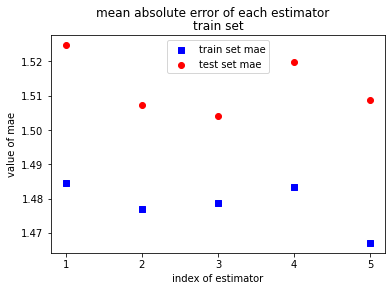

In [ ]:
MAE_train, MAE_test, INDEX = getMAE_from_estimators(clf.estimators_)

In [ ]:
for i,m in zip(INDEX, MAE_train):
  print('Estimator index:',i,', its mean absolute error of train set is:',m)

Estimator index: 1 , its mean absolute error of train set is: 1.4845070422535211
Estimator index: 2 , its mean absolute error of train set is: 1.4769014084507042
Estimator index: 3 , its mean absolute error of train set is: 1.4785915492957746
Estimator index: 4 , its mean absolute error of train set is: 1.483380281690141
Estimator index: 5 , its mean absolute error of train set is: 1.4670422535211267


In [ ]:
for i,m in zip(INDEX, MAE_test):
  print('Estimator index:',i,', its mean absolute error of test set is:',m)

Estimator index: 1 , its mean absolute error of test set is: 1.5247208931419458
Estimator index: 2 , its mean absolute error of test set is: 1.507177033492823
Estimator index: 3 , its mean absolute error of test set is: 1.503987240829346
Estimator index: 4 , its mean absolute error of test set is: 1.5199362041467304
Estimator index: 5 , its mean absolute error of test set is: 1.5087719298245614


A function, give 3 params as its input : model, X and y. and it will return the mean absolute error.  
This function is for project2.   
Since the above fucntion already return mae for project 1, So I don't use the below function to get mae for project1.

In [ ]:
# this function return mae by one model and its X (features, can be train or test) and y (real values, can be train or test)
def getMAE_from_model(model, X, y):
  result = 'mean absolute error: ' + str(mean_absolute_error(y, [round(x) for x in model.predict(X)]))
  return result

## 6. The function is 'getMAE(estimators)'

In [ ]:
# this function can draw two scattet plots. Xlabel is true value, Ylabel is prediction value.
# the input of the function is one model, and X_train, X_test, y_train, y_test, Range(a list, for the range of y=x line)
def plot_prediction(model, X_train, X_test, y_train, y_test, Range):
  # do prediction and round the results 
  prediction_train = [round(x) for x in model.predict(X_train)]
  prediction_test = [round(x) for x in model.predict(X_test)]
  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
  ax1.axis('equal')
  ax1.plot(Range, Range, 'k-', alpha=0.75, zorder=0)
  ax1.set_title('train set')
  ax1.set_xlabel('true value')
  ax1.set_ylabel('prediction value')
  ax1.scatter(y_train, prediction_train, alpha = 0.2)
  
  ax2.axis('equal')
  ax2.plot(Range, Range, 'k-', alpha=0.75, zorder=0)
  ax2.set_xlabel('true value')
  ax2.set_ylabel('prediction value')
  ax2.set_title('test set')
  ax2.scatter(y_test, prediction_test, alpha = 0.2)

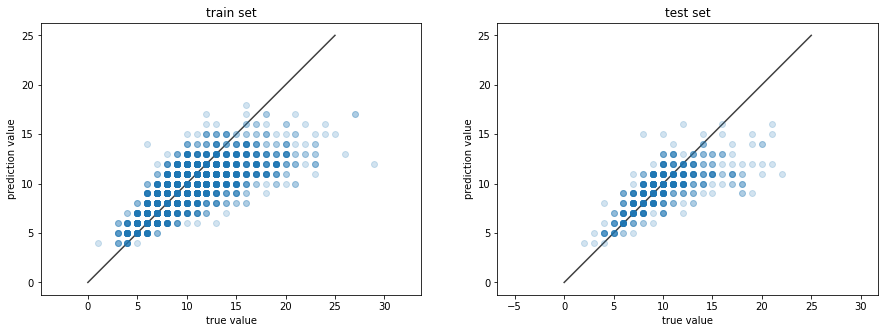

In [ ]:
plot_prediction(clf, X_train, X_test, y_train, y_test, [0,25])

## 7. raw prediction errors

In [ ]:
# the input of the function are train and test sets' true and predict values.
def rawErrHist(true_train, true_test, prediction_train, prediction_test):
  error_train=[]
  error_test=[]

  for t,p in zip(true_train, prediction_train):
    error_train.append(t-p)

  for t,p in zip(true_test, prediction_test):
    error_test.append(t-p)

  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

  x_error_train = sorted(set(error_train))
  x_error_test = sorted(set(error_test))
  y_error_train = []
  y_error_test = []
  for i in x_error_train:
    y_error_train.append(error_train.count(i)/len(error_train))
  for i in x_error_test:
    y_error_test.append(error_test.count(i)/len(error_test))

  ax1.set_title('train set')
  ax1.set_xlabel('raw error')
  ax1.set_ylabel('rate')
  ax1.set_xticks(np.arange(min(x_error_train), max(x_error_train)+1, 1.0))
  rects1 = ax1.bar(x_error_train, height=y_error_train)
  for i, v in enumerate(y_error_train):
    ax1.text(x_error_train[i] - 0.25, v + 0.01, str(round(v,2)))

  ax2.set_title('test set')
  ax2.set_xlabel('raw error')
  ax2.set_ylabel('rate')
  ax2.set_xticks(np.arange(min(x_error_test), max(x_error_test)+1, 1.0))
  ax2.bar(x_error_test, height=y_error_test)
  for i, v in enumerate(y_error_test):
    ax2.text(x_error_test[i] - 0.25, v + 0.01, str(round(v,2)))


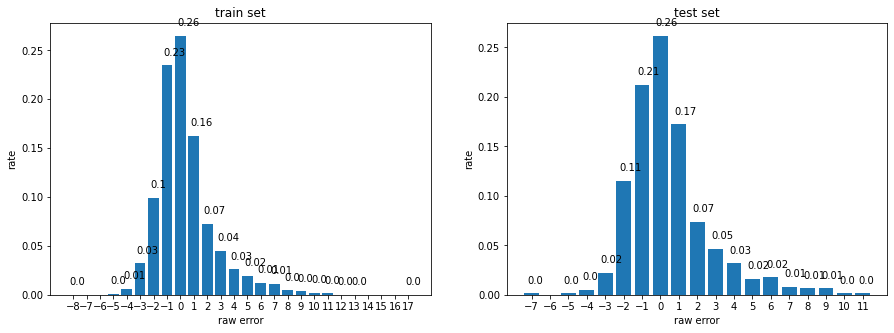

In [ ]:
rawErrHist(y_train, y_test, rounded_prediction_train, rounded_prediction_test)

## 8. Compare 

AdaBoost regressor works better on the training than test set.
1. The MAEs of train set is samller than test set.
2. From the scatter plot of true and prediction of both train and test set, The distribution of points of train set is more similar to the slash of y=x.
3. The raw error of train set is better than test set.

# Project2

## Read Data

In [ ]:
wine_df = pd.read_csv('winequality-red.csv',sep=';')

In [ ]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wine_df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

checked, no missing values.

## 1. Clean Data & Split Data & Train Model

### 1.1 Clean Data

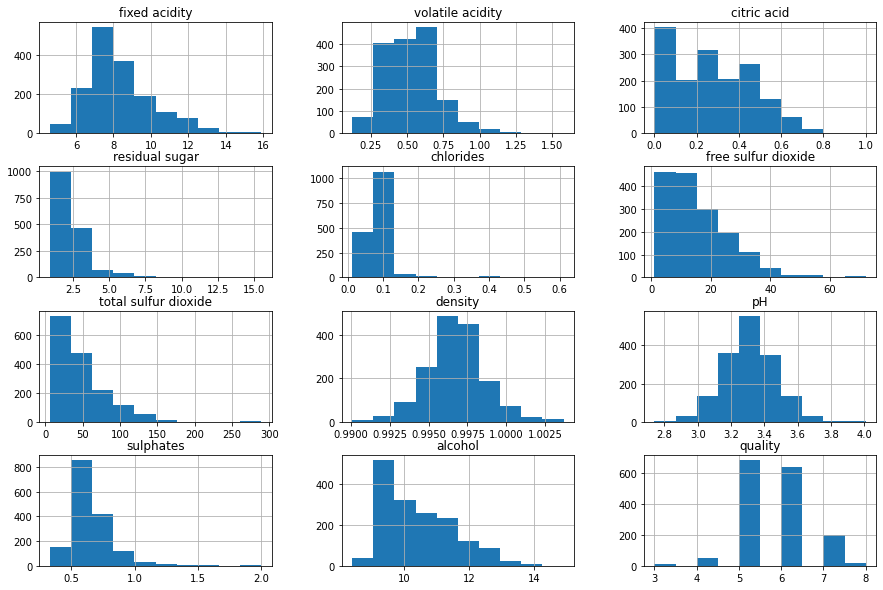

In [ ]:
wine_df.hist(figsize=(15,10));

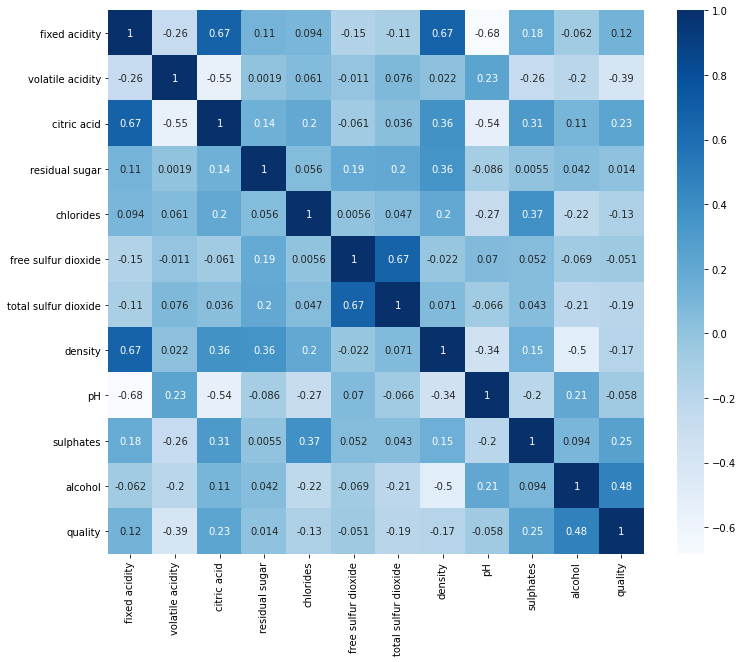

In [ ]:
corr = wine_df.corr()
plt.figure(figsize=(12, 10))
sb.heatmap(corr, cmap="Blues", annot=True);

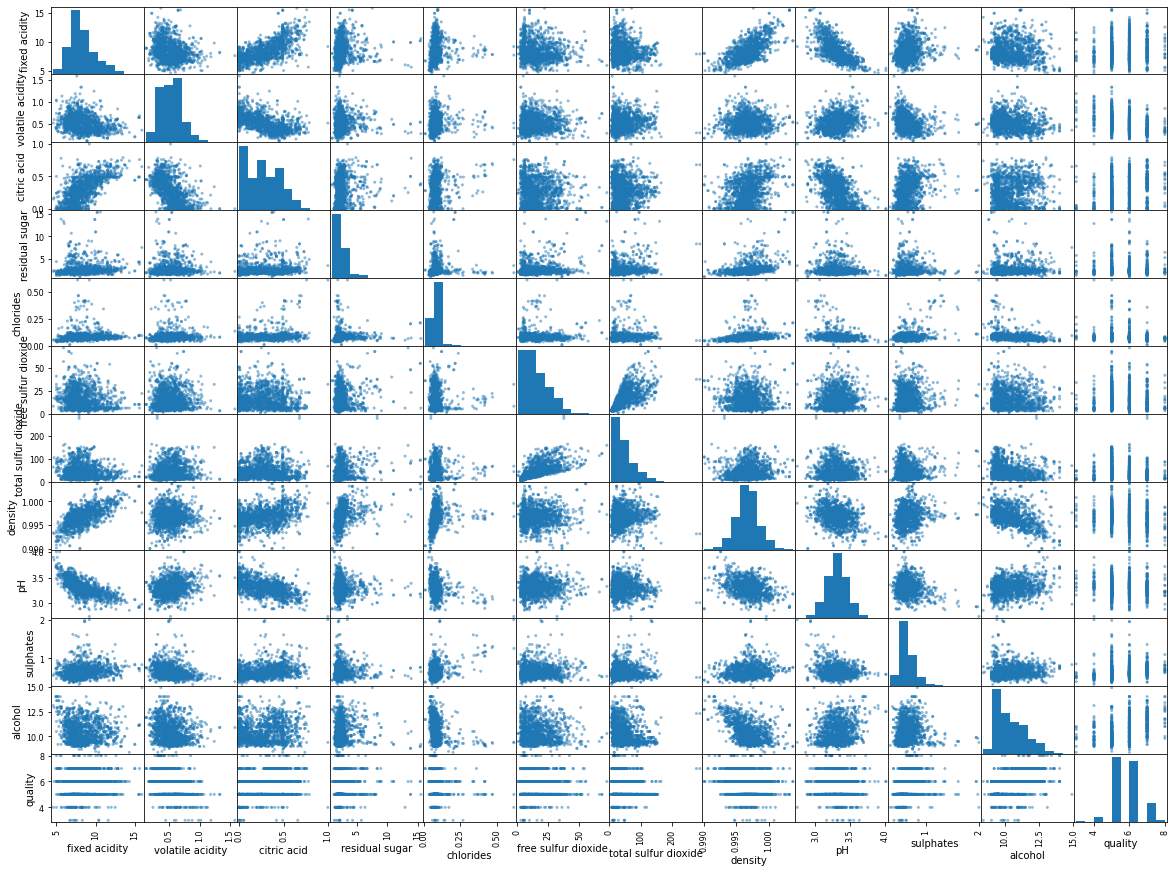

In [ ]:
scatter_matrix(wine_df,figsize=(20,15));

The correlations between fixed acidity and density/citric acid are relatively/obviously high(0.67), I decide to remove fixed acidity.


In [ ]:
wine_df = wine_df.drop('fixed acidity', axis=1)

### 1.2 Split data

In [ ]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

### 1.3 Train model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=6, random_state=1, criterion='mae', n_estimators=100, max_features=0.2, min_samples_leaf=1)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=6, max_features=0.2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
print('train set:', getMAE_from_model(regr, X_train, y_train))
print('test set:', getMAE_from_model(regr, X_test, y_test))

train set: mean absolute error: 0.40176600441501104
test set: mean absolute error: 0.37916666666666665


Very high mas on test set (under fitting).  
Try to change hyperparameter values to solve it.  
To solve under fitting, increase max_depth is useful.

In [ ]:
regr = RandomForestRegressor(max_depth=13, random_state=1, criterion='mae', n_estimators=100, max_features=0.2, min_samples_leaf=1)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=13, max_features=0.2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
print('train set:', getMAE_from_model(regr, X_train, y_train))
print('test set:', getMAE_from_model(regr, X_test, y_test))

train set: mean absolute error: 0.30610743193524653
test set: mean absolute error: 0.35833333333333334


low mae on train set, but high mae on test set, (over fitting).  
Try to change hyperparameter values to solve it.  
To solve over fitting, increase n_estimators and min_samples_leaf are useful, also, decrease depth will reduce over fitting.

In [ ]:
regr = RandomForestRegressor(max_depth=11, random_state=1, criterion='mae', n_estimators=500, max_features=0.2, min_samples_leaf=2)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=11, max_features=0.2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
print('train set:', getMAE_from_model(regr, X_train, y_train))
print('test set:', getMAE_from_model(regr, X_test, y_test))

train set: mean absolute error: 0.35908756438557765
test set: mean absolute error: 0.3416666666666667


After change hyperparameter, the mean absolute error on test set is better.  
Next, I'll display the raw error on train and test of the final model  

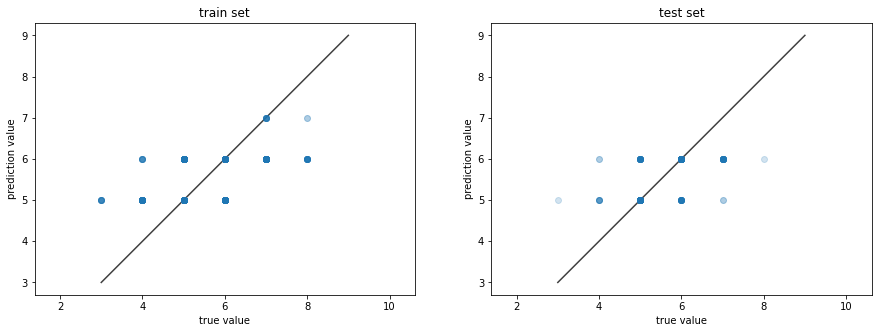

In [ ]:
plot_prediction(regr,X_train, X_test, y_train, y_test, [3,9])

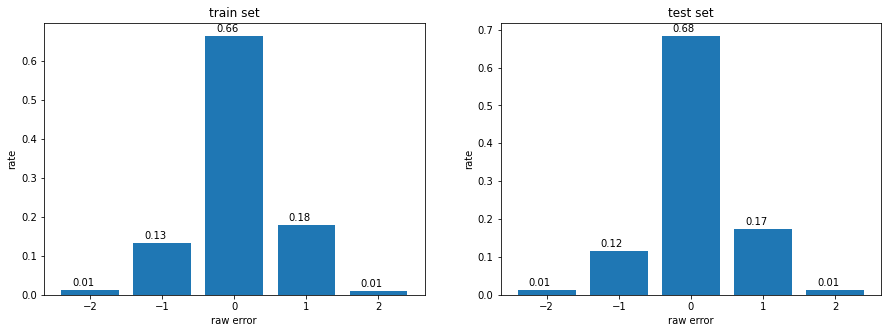

In [ ]:
rawErrHist(y_train, y_test, [round(x) for x in regr.predict(X_train)], [round(x) for x in regr.predict(X_test)])

Almost the same

## 2. Reduce dimensional

In [ ]:
total_selected_features_score = 0
for name,score in zip(X.columns.values,regr.feature_importances_):
  print(name,': ',score)
  if score > 0.05:
    total_selected_features_score += score

volatile acidity :  0.17582253966700379
citric acid :  0.05538162840050802
residual sugar :  0.03719671456866295
chlorides :  0.07599822318213786
free sulfur dioxide :  0.0419701105899821
total sulfur dioxide :  0.12200431541343548
density :  0.10194226175910823
pH :  0.050649392998576445
sulphates :  0.1250984956159923
alcohol :  0.21393631780459285


In [ ]:
print('total selected features importance value:', total_selected_features_score)

total selected features importance value: 0.920833174841355


In [ ]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=regr).fit(X, y)

In [ ]:
selector.transform(X)

array([[ 0.7    , 34.     ,  0.9978 ,  0.56   ,  9.4    ],
       [ 0.88   , 67.     ,  0.9968 ,  0.68   ,  9.8    ],
       [ 0.76   , 54.     ,  0.997  ,  0.65   ,  9.8    ],
       ...,
       [ 0.51   , 40.     ,  0.99574,  0.75   , 11.     ],
       [ 0.645  , 44.     ,  0.99547,  0.71   , 10.2    ],
       [ 0.31   , 42.     ,  0.99549,  0.66   , 11.     ]])

In [ ]:
X[:5]

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


As compare the output of selector transform and raw features, I find the selected features are:   
* volatile acidity (✓)  
* total sulfur dioxide (✓) 
* density (✓) 
* sulphates (✓)  
* alcohol (✓)  
As the lab task required (importance above 5%), I add:  
* citric acid (✓)
* chlorides (✓)
* PH (✓)

Finally, I removed:
* residual sugar (X)
* free sulfur dioxide (X)

In [ ]:
X = X.drop(['residual sugar', 'free sulfur dioxide'], axis=1)

## 3. Train and predict 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [ ]:
regr = RandomForestRegressor(max_depth=11, random_state=1, criterion='mae', n_estimators=500, max_features=0.2, min_samples_leaf=2)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=11, max_features=0.2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
print('train set:', getMAE_from_model(regr, X_train, y_train))
print('test set:', getMAE_from_model(regr, X_test, y_test))

train set: mean absolute error: 0.35688005886681384
test set: mean absolute error: 0.37916666666666665


In [ ]:
rounded_prediction_train = [round(x) for x in regr.predict(X_train)]
rounded_prediction_test = [round(x) for x in regr.predict(X_test)]

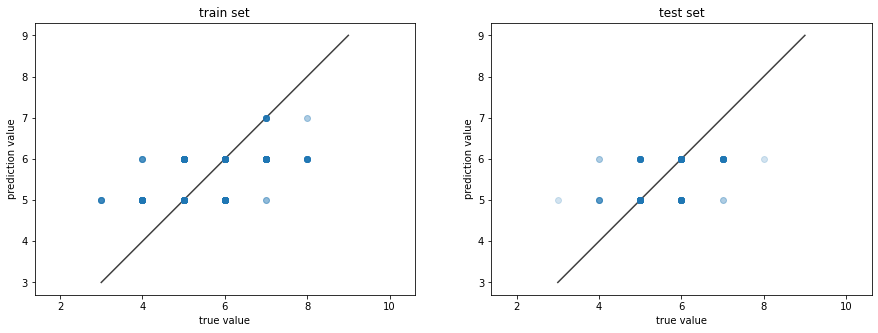

In [ ]:
plot_prediction(regr,X_train, X_test, y_train, y_test, [3,9])

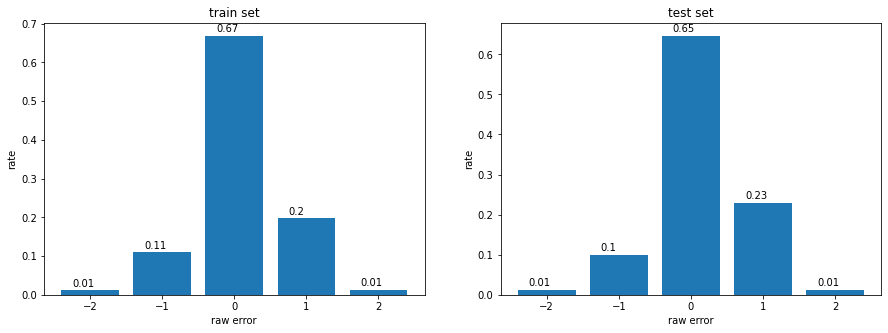

In [ ]:
rawErrHist(y_train, y_test, rounded_prediction_train, rounded_prediction_test)

## 4. Compare

The performance of first model (before Reduce dimensional) is a little better than second one (after Reduce dimensional).  
1. The MAEs of train set are almost the same , but the MAEs of test on first model (0.341) is better than second one (0.379).
2. The distribution of true and prediction on this two models are almost the same.
3. The raw error shows the first model is slightly better.